In [9]:
import pandas as pd
from Bio import SeqIO

In [31]:
reads = pd.read_table("/Users/munir/mnt/CLUSTER/effectorO/bremia_lsg_ml_expression_analysis/output/sp_GCA_004359215.1_BlacSF5_genomic_ORFs_readcounts_withLabels.txt", header=None)
reads.columns = ["scaffold", "start", "end", "ID", "counts"]

with open("/Users/munir/mnt/CLUSTER/effectorO/genomes/ORFs/ORFs_to_analyze/rxlr_eer_secreted_genes/rxlr_eer_cleaved_sp_B_lac-SF5.protein.fasta") as f:
    RXLREER = f.read().splitlines()

with open("/Users/munir/mnt/CLUSTER/effectorO/genomes/ORFs/ORFs_to_analyze/wy_secreted_genes/wy_cleaved_sp_B_lac-SF5.protein.fasta") as f:
    WY = f.read().splitlines()

with open("/Users/munir/mnt/CLUSTER/effectorO/genomes/ORFs/ORFs_to_analyze/mlRF88IDs_secreted_genes/ml_sp_B_lac-SF5.protein.fasta") as f:
    ML = f.read().splitlines()
    
with open("/Users/munir/mnt/CLUSTER/effectorO/genomes/ORFs/ORFs_to_analyze/20200913_lsg_secreted_35perc_genomesRemoved/lsgIDs_sp_B_lac-SF5.protein.fasta") as f:
    LSP = f.read().splitlines()

In [32]:
b_file = "/Users/munir/mnt/CLUSTER/effectorO/genomes/ORFs/ORFs_to_analyze/secretomes/sp_GCA_004359215.1_BlacSF5_genomic_ORFs.protein.fasta_bk"

ids_greater_80 = []
with open(b_file, "rU") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        if (len(record.seq) >= 80):
            ids_greater_80.append(record.id)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 'U' mode is deprecated
  after removing the cwd from sys.path.


In [33]:
tab_path = "/Users/munir/mnt/CLUSTER/effectorO/genomes/ORFs/ORFs_to_analyze/secretomes/blastp/v8_vs_NCBI.tab"

blast = pd.read_csv(tab_path, sep='\t',
                    names = ["qseqid", "sseqid", "pident", "length", "mismatch", "gapopen", "qstart", "qend", "sstart", "send", "evalue", "bitscore","qcovs"])

In [34]:
top_blast = blast[ (blast.pident == 100)
             & (blast.qcovs == 100)
             & (blast.qend == blast.send)
             ]
# top_blast

In [35]:
24694
reads['len'] = reads['end'] - reads['start']

In [36]:
merged = pd.merge(top_blast, reads, left_on='sseqid', right_on='ID')


In [37]:
merged = merged.groupby('qseqid').apply(lambda g: g[g.counts == g.counts.max()])
merged.head(1)

,,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qcovs,scaffold,start,end,ID,counts,len
qseqid,,,,,,,,,,,,,,,,,,,,
Blac_SF5_v8_100_ORF924763_fr3,3603,Blac_SF5_v8_100_ORF924763_fr3,SHOA01000004.1_ORF1584102_fr5,100.0,83,0,0,1,83,1,83,7.000000e-57,171.0,100,SHOA01000004.1,9098771,9099019,SHOA01000004.1_ORF1584102_fr5,9,248


In [38]:
max_merged = merged.reset_index(drop=True).drop_duplicates(['qseqid'])
len(max_merged)

7360

In [39]:
max_merged = max_merged.rename(columns={'ID' : 'old'})
max_merged = max_merged.rename(columns={'qseqid' : 'ID'})
max_merged.head(1)

,ID,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qcovs,scaffold,start,end,old,counts,len
0,Blac_SF5_v8_100_ORF924763_fr3,SHOA01000004.1_ORF1584102_fr5,100.0,83,0,0,1,83,1,83,7.000000e-57,171.0,100,SHOA01000004.1,9098771,9099019,SHOA01000004.1_ORF1584102_fr5,9,248


In [40]:
reads = max_merged
reads['counts_dividedby_length'] = reads['counts'] / (reads['end'] - reads['start'])

In [41]:
del reads['old']
del reads['len']
reads.head(2)

,ID,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,qcovs,scaffold,start,end,counts,counts_dividedby_length
0,Blac_SF5_v8_100_ORF924763_fr3,SHOA01000004.1_ORF1584102_fr5,100.0,83,0,0,1,83,1,83,7.000000e-57,171.0,100,SHOA01000004.1,9098771,9099019,9,0.036290
1,Blac_SF5_v8_100_ORF924787_fr3,SHOA01000004.1_ORF1584129_fr5,100.0,82,0,0,1,82,1,82,4.000000e-54,163.0,100,SHOA01000004.1,9097181,9097426,9,0.036735


In [42]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [51]:
ML_and_LSP = intersection(LSP,ML)
ML_only = set(ML) - set(LSP)
LSP_only = set(LSP) - set(ML)
reads['LSP'] = reads['ID'].isin(LSP_only)
reads['ML'] = reads['ID'].isin(ML_only)
reads['ML_and_LSG'] = reads['ID'].isin(ML_and_LSP)
reads['WY'] = reads['ID'].isin(WY)
reads['RXLREER'] = reads['ID'].isin(RXLREER)

In [52]:
print(len(reads[reads['ML'] == True]))
print(len(reads[reads['LSP'] == True]))
print(len(reads[reads['ML_and_LSG'] == True]))

1170
1849
602


In [53]:
reads['counts_dividedby_length'] = reads['counts'] / reads['length']
reads

,ID,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,...,scaffold,start,end,counts,counts_dividedby_length,LSP,ML,ML_and_LSG,WY,RXLREER
0,Blac_SF5_v8_100_ORF924763_fr3,SHOA01000004.1_ORF1584102_fr5,100.0,83,0,0,1,83,1,83,...,SHOA01000004.1,9098771,9099019,9,0.108434,False,False,False,False,False
1,Blac_SF5_v8_100_ORF924787_fr3,SHOA01000004.1_ORF1584129_fr5,100.0,82,0,0,1,82,1,82,...,SHOA01000004.1,9097181,9097426,9,0.109756,True,False,False,False,False
2,Blac_SF5_v8_100_ORF925353_fr4,SHOA01000006.1_ORF1962648_fr2,100.0,118,0,0,1,118,1,118,...,SHOA01000006.1,3950117,3950470,1035,8.771186,False,False,False,False,False
3,Blac_SF5_v8_100_ORF925543_fr2,SHOA01000003.1_ORF1366278_fr1,100.0,102,0,0,1,102,1,102,...,SHOA01000003.1,847627,847932,50,0.490196,True,False,False,False,False
4,Blac_SF5_v8_100_ORF925933_fr4,SHOA01000116.1_ORF453704_fr4,100.0,111,0,0,1,111,1,111,...,SHOA01000116.1,313812,314144,487,4.387387,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7672,Blac_SF5_v8_9_ORF157289_fr1,SHOA01000114.1_ORF356722_fr6,100.0,163,0,0,1,163,1,163,...,SHOA01000114.1,2829035,2829523,6,0.036810,True,False,False,False,False
7673,Blac_SF5_v8_9_ORF157303_fr3,SHOA01000114.1_ORF356733_fr5,100.0,142,0,0,1,142,1,142,...,SHOA01000114.1,2828337,2828762,1,0.007042,True,False,False,False,False
7674,Blac_SF5_v8_9_ORF157335_fr5,SHOA01000010.1_ORF89485_fr2,100.0,82,0,0,1,82,1,82,...,SHOA01000010.1,1502387,1502632,0,0.000000,False,False,False,False,False
7675,Blac_SF5_v8_9_ORF157362_fr1,SHOA01000114.1_ORF356773_fr6,100.0,163,0,0,1,163,1,163,...,SHOA01000114.1,2825618,2826106,0,0.000000,False,False,True,False,False


In [54]:
minWYexp = reads[reads.WY == True].counts_dividedby_length.min()
minWYexp

0.07792207792207792

In [55]:
reads[  
#     (reads.ML == True)
#       & (reads.ML == True)
      (reads.counts_dividedby_length >= minWYexp) ]

,ID,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,...,scaffold,start,end,counts,counts_dividedby_length,LSP,ML,ML_and_LSG,WY,RXLREER
0,Blac_SF5_v8_100_ORF924763_fr3,SHOA01000004.1_ORF1584102_fr5,100.0,83,0,0,1,83,1,83,...,SHOA01000004.1,9098771,9099019,9,0.108434,False,False,False,False,False
1,Blac_SF5_v8_100_ORF924787_fr3,SHOA01000004.1_ORF1584129_fr5,100.0,82,0,0,1,82,1,82,...,SHOA01000004.1,9097181,9097426,9,0.109756,True,False,False,False,False
2,Blac_SF5_v8_100_ORF925353_fr4,SHOA01000006.1_ORF1962648_fr2,100.0,118,0,0,1,118,1,118,...,SHOA01000006.1,3950117,3950470,1035,8.771186,False,False,False,False,False
3,Blac_SF5_v8_100_ORF925543_fr2,SHOA01000003.1_ORF1366278_fr1,100.0,102,0,0,1,102,1,102,...,SHOA01000003.1,847627,847932,50,0.490196,True,False,False,False,False
4,Blac_SF5_v8_100_ORF925933_fr4,SHOA01000116.1_ORF453704_fr4,100.0,111,0,0,1,111,1,111,...,SHOA01000116.1,313812,314144,487,4.387387,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660,Blac_SF5_v8_9_ORF155809_fr4,SHOA01000010.1_ORF87699_fr1,100.0,1662,0,0,1,1662,1,1662,...,SHOA01000010.1,1404538,1409523,641,0.385680,False,False,False,False,False
7664,Blac_SF5_v8_9_ORF156125_fr2,SHOA01000114.1_ORF355730_fr4,100.0,180,0,0,1,180,1,180,...,SHOA01000114.1,2906479,2907018,160,0.888889,False,False,False,False,False
7666,Blac_SF5_v8_9_ORF156610_fr6,SHOA01000010.1_ORF88510_fr3,100.0,98,0,0,1,98,1,98,...,SHOA01000010.1,1452786,1453079,1823,18.602041,False,False,False,False,False
7667,Blac_SF5_v8_9_ORF156905_fr4,SHOA01000010.1_ORF89125_fr1,100.0,137,0,0,1,137,1,137,...,SHOA01000010.1,1481233,1481643,422,3.080292,False,True,False,False,False


In [56]:
# reads.to_csv("/Users/munir/mnt/CLUSTER/effectorO/bremia_lsg_ml_expression_analysis/output/sp_GCA_004359215.1_BlacSF5_genomic_ORFs_readcounts_withLabels_20200713.txt", index=False, sep='\t')

In [57]:
# reads = pd.read_csv("/Users/munir/mnt/CLUSTER/effectorO/bremia_lsg_ml_expression_analysis/output/sp_GCA_004359215.1_BlacSF5_genomic_ORFs_readcounts_withLabels_20200713.txt", sep='\t')
# reads

In [58]:
import seaborn as sns, numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ztest
import numpy as np
import matplotlib.pyplot as plt


# plt.rcParams["axes.labelsize"] = 25
# plt.rcParams["axes.titlesize"] = 20
# plt.rcParams["xtick.labelsize"] = 25

In [59]:
# all_reads = reads.copy()
# reads = reads[reads.counts_dividedby_length >= minWYexp]
# print('all reads len: ' , len(all_reads))
# print('"expressed" reads len: ' , len(reads))

# reads = all_reads.copy()
print('"reads" len: ' , len(reads))

"reads" len:  7360


<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

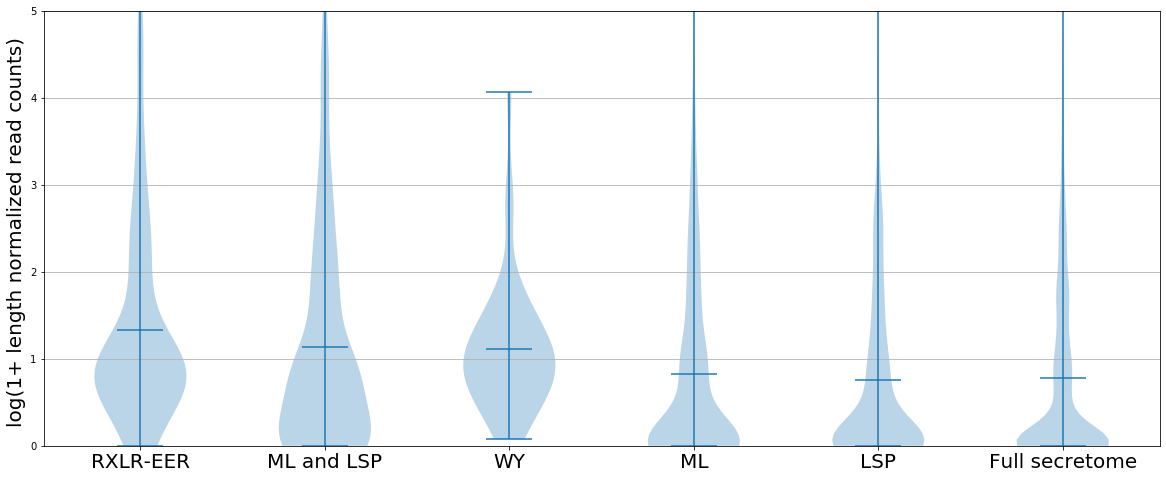

In [68]:
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

# generate some random data
data1 = (reads[reads.ML_and_LSG == True]['counts_dividedby_length'] + 0).values.tolist()
data2 = (reads[reads.ML == True]['counts_dividedby_length'] + 0).values.tolist()
data3 = (reads[reads.LSP == True]['counts_dividedby_length'] + 0).values.tolist()
data4 = (reads[reads.RXLREER == True]['counts_dividedby_length'] + 0).values.tolist()
data5 = (reads[reads.WY == True]['counts_dividedby_length'] + 0).values.tolist()
data6 = (reads['counts_dividedby_length'] + 0).values.tolist()

data1 = np.log(reads[(reads.ML_and_LSG == True)]['counts_dividedby_length'] + 1).values.tolist()
data2 = np.log(reads[reads.ML == True]['counts_dividedby_length'] + 1).values.tolist()
data3 = np.log(reads[reads.LSP == True]['counts_dividedby_length'] + 1).values.tolist()
data4 = np.log(reads[reads.RXLREER == True]['counts_dividedby_length'] + 1).values.tolist()
data5 = np.log(reads[reads.WY == True]['counts_dividedby_length'] + 1).values.tolist()
data6 = np.log(reads['counts_dividedby_length'] + 1).values.tolist()
data = list([data1, data2, data3, data4, data5, data6])
data = list([data4, data1, data5, data2, data3, data6])

fig, ax = plt.subplots(figsize=(20,8))


# build a violin plot
ax.violinplot(data, showmeans=True, showmedians=False)


# add title and axis labels
ax.set_ylabel('log(1+ length normalized read counts) ', fontsize=20)
ax.set_ylim(top=5, bottom=0)


# add x-tick labels
xticklabels = ['ML and LSP', 'ML', 'LSP', "RXLR-EER", "WY", 'Full secretome']
xticklabels = ['RXLR-EER', 'ML and LSP', 'WY', "ML", "LSP", 'Full secretome']
ax.set_xticks([1,2,3,4,5,6])
ax.set_xticklabels(xticklabels, fontsize=20)


# add horizontal grid lines
ax.yaxis.grid(True)


# show the plot
plt.savefig(f"/Users/munir/Desktop/final_figs/20210212/fig5_expression_comp_panel.tiff" , dpi=600)
plt

In [184]:
for p in data:
    print((np.round(np.median(p), 3)))

0.053
0.025
0.05
0.106
0.517
0.022


| Group          | Mean Raw Counts | Median Raw Counts | Median Normalized Counts (Counts / Length) |
|----------------|-----------------|-------------------|--------------------------------------------|
| ML and LSP     | 1371.5          | 12                | 0.053                                      |
| ML             | 1367.99         | 7                 | 0.025                                      |
| LSP            | 576.05          | 10                | 0.05                                       |
| RXLR-EER       | 3731.61         | 41                | 0.106                                      |
| WY             | 1789.85         | 720               | 0.517                                      |
| Full Secretome | 588.88          | 5                 | 0.022                                      |

In [162]:
print(np.quantile(data[4], [0.25, 0.5, 0.75]))
print(np.quantile(data[5], [0.25, 0.5, 0.75]))

[0.26151821 0.41663648 0.64696074]
[0.         0.02150621 0.36226193]


In [158]:
print(np.quantile(data[4], [0.25, 0.5, 0.75]))
print(np.quantile(data[5], [0.25, 0.5, 0.75]))

[0.29891035 0.51697492 0.90978796]
[0.         0.02173913 0.43657517]


In [172]:
reads[reads['WY']==True]

,scaffold,start,end,ID,counts,counts_dividedby_length,LSP,ML,ML_and_LSG,WY,RXLREER
623,SHOA01000010.1,297514,299136,SHOA01000010.1_ORF70297_fr1,647,0.398890,False,False,False,True,False
2021,SHOA01000114.1,140342,141934,SHOA01000114.1_ORF212392_fr2,462,0.290201,False,True,False,True,False
2419,SHOA01000114.1,2448815,2450272,SHOA01000114.1_ORF255173_fr2,27764,19.055594,True,True,True,True,False
3460,SHOA01000114.1,2150487,2152931,SHOA01000114.1_ORF369355_fr5,1060,0.433715,False,False,False,True,True
3485,SHOA01000114.1,2066036,2067532,SHOA01000114.1_ORF371073_fr6,211,0.141043,False,True,False,True,False
6731,SHOA01000012.1,328139,330004,SHOA01000012.1_ORF728935_fr2,2253,1.208043,True,True,True,True,False
6738,SHOA01000012.1,372719,374500,SHOA01000012.1_ORF729500_fr2,1409,0.791129,True,True,True,True,False
6740,SHOA01000012.1,377047,378828,SHOA01000012.1_ORF729603_fr1,1471,0.825940,True,True,True,True,False
6742,SHOA01000012.1,392865,394643,SHOA01000012.1_ORF729965_fr3,1118,0.628796,True,True,True,True,False
6745,SHOA01000012.1,415684,417462,SHOA01000012.1_ORF730412_fr1,1006,0.565804,True,True,True,True,False


In [212]:
LSP = reads[reads['LSP']==True]
LSP_over_0 = LSP[LSP['counts'] > 0]

In [216]:
LSP_over_0

,scaffold,start,end,ID,counts,counts_dividedby_length,LSP,ML,ML_and_LSG,WY,RXLREER
0,SHOA01000001.1,3331929,3332108,SHOA01000001.1_ORF32_fr4,138,0.770950,True,True,True,False,False
2,SHOA01000001.1,3327264,3327470,SHOA01000001.1_ORF138_fr4,30,0.145631,True,False,False,False,False
3,SHOA01000001.1,3324582,3324758,SHOA01000001.1_ORF213_fr4,17,0.096591,True,False,False,False,False
14,SHOA01000001.1,3214449,3214667,SHOA01000001.1_ORF2378_fr4,246,1.128440,True,False,False,False,False
15,SHOA01000001.1,3204085,3204282,SHOA01000001.1_ORF2607_fr6,91,0.461929,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
19272,SHOA01000009.1,5977334,5977540,SHOA01000009.1_ORF2110012_fr2,106,0.514563,True,False,False,False,False
19274,SHOA01000009.1,10896,11072,SHOA01000009.1_ORF2110245_fr4,115,0.653409,True,False,False,False,False
19276,SHOA01000091.1,520,741,SHOA01000091.1_ORF2110513_fr1,472,2.135747,True,False,False,False,False
19277,SHOA01000097.1,1319,1501,SHOA01000097.1_ORF2110786_fr4,238,1.307692,True,False,False,False,False


In [215]:
LSP_over_0[LSP_over_0['ML']==True]

,scaffold,start,end,ID,counts,counts_dividedby_length,LSP,ML,ML_and_LSG,WY,RXLREER
0,SHOA01000001.1,3331929,3332108,SHOA01000001.1_ORF32_fr4,138,0.770950,True,True,True,False,False
30,SHOA01000001.1,212510,212758,SHOA01000001.1_ORF4522_fr2,9,0.036290,True,True,True,False,False
37,SHOA01000001.1,3079285,3079452,SHOA01000001.1_ORF5400_fr6,5067,30.341317,True,True,True,False,False
49,SHOA01000001.1,3018518,3018943,SHOA01000001.1_ORF6750_fr5,174,0.409412,True,True,True,False,True
78,SHOA01000001.1,2892395,2893267,SHOA01000001.1_ORF9334_fr5,3055,3.503440,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
19207,SHOA01000009.1,5603363,5603518,SHOA01000009.1_ORF2103712_fr2,7,0.045161,True,True,True,False,False
19222,SHOA01000009.1,323894,324142,SHOA01000009.1_ORF2105269_fr5,312,1.258065,True,True,True,False,False
19263,SHOA01000009.1,121212,121646,SHOA01000009.1_ORF2108829_fr4,1,0.002304,True,True,True,False,False
19264,SHOA01000009.1,5888366,5888641,SHOA01000009.1_ORF2109060_fr2,489,1.778182,True,True,True,False,False


In [219]:
reads[reads['ML']==True]

,scaffold,start,end,ID,counts,counts_dividedby_length,LSP,ML,ML_and_LSG,WY,RXLREER
0,SHOA01000001.1,3331929,3332108,SHOA01000001.1_ORF32_fr4,138,0.770950,True,True,True,False,False
10,SHOA01000001.1,59516,59986,SHOA01000001.1_ORF1453_fr2,0,0.000000,False,True,False,False,False
11,SHOA01000001.1,67706,68176,SHOA01000001.1_ORF1585_fr2,2,0.004255,False,True,False,False,False
12,SHOA01000001.1,79422,79610,SHOA01000001.1_ORF1772_fr3,1,0.005319,False,True,False,False,False
17,SHOA01000001.1,3191463,3191708,SHOA01000001.1_ORF2854_fr4,10,0.040816,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
19261,SHOA01000009.1,5873418,5873714,SHOA01000009.1_ORF2108702_fr3,0,0.000000,True,True,True,False,False
19263,SHOA01000009.1,121212,121646,SHOA01000009.1_ORF2108829_fr4,1,0.002304,True,True,True,False,False
19264,SHOA01000009.1,5888366,5888641,SHOA01000009.1_ORF2109060_fr2,489,1.778182,True,True,True,False,False
19265,SHOA01000009.1,5889165,5890601,SHOA01000009.1_ORF2109107_fr3,767,0.534123,False,True,False,False,False


In [218]:
LSP = 6773 / 19279
print(LSP)

0.35131490222521916


In [223]:
ML = 2871 / 19279
print(ML)

0.1489185123709736


In [220]:
ML_LSPover0 = 936 / 2871
print(ML_LSPover0)

0.32601880877742945


In [222]:
LSP_that_are_ML = 936/6773
print(LSP_that_are_ML)

0.1381957773512476


In [224]:
0.32601880877742945 - 0.35131490222521916

-0.025296093447789714

In [225]:
0.1381957773512476 - 0.1489185123709736

-0.010722735019725982